# This model will help to calculate BMI using this input features

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import warnings


In [5]:
import pandas as pd
import io
import requests

# Replace 'your_raw_csv_url' with the actual raw CSV URL
url = "https://raw.githubusercontent.com/Aadeshkhd-hub/5CS037_Aadesh_khadka-2417332/ffde8d70f5cd9c3d216e296336d16e4528fdc732/gym_members_exercise_tracking.csv"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Read the CSV data into a Pandas DataFrame
gym_members = pd.read_csv(io.StringIO(response.text))

In [6]:
# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new column
gym_members['BMI_Category'] = gym_members['BMI'].apply(bmi_category)

# Display the first few rows to verify
gym_members.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Obese
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Obese
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Normal weight
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Underweight
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Underweight


In [7]:
gym_members.shape

(973, 16)

In [8]:
gym_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [9]:
gym_members.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [10]:
categorical_features = [feature for feature in gym_members.columns if gym_members[feature].dtype == 'O']
numerical_features = [feature for feature in gym_members.columns if feature not in categorical_features]

In [11]:
numerical_features

['Age',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [12]:
categorical_features.remove('BMI_Category')

In [13]:
## value counts of categorical features
for col in categorical_features:
    counts = gym_members[col].value_counts()
    print(f"\n============{col}================")
    print(counts)


============Gender================
Gender
Male      511
Female    462
Name: count, dtype: int64

============Workout_Type================
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


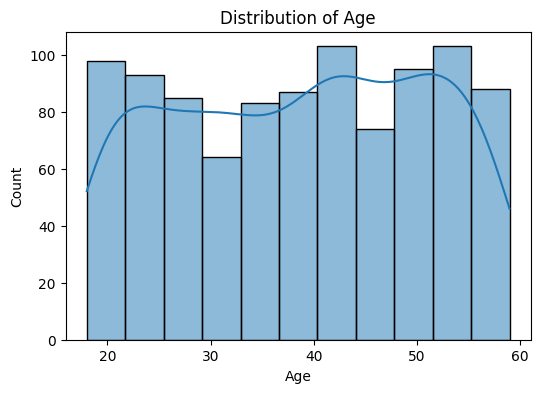

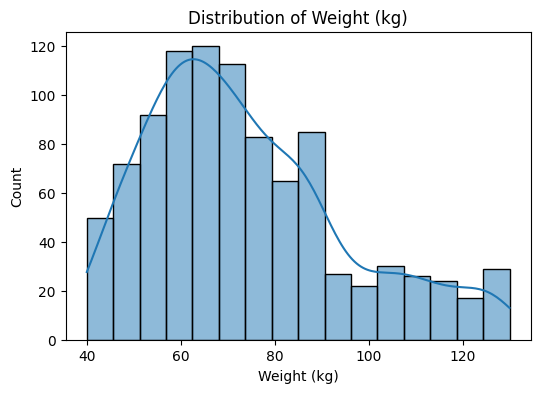

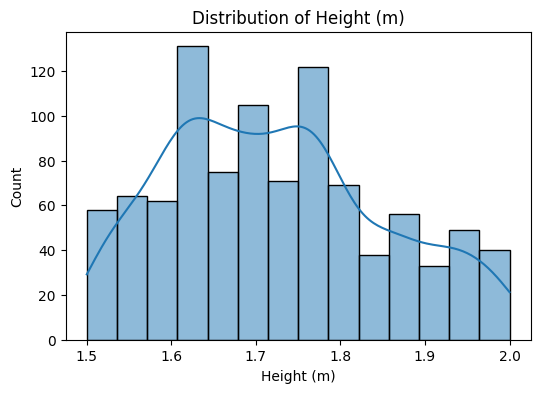

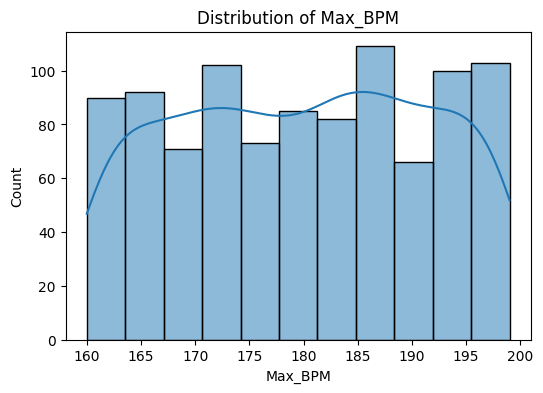

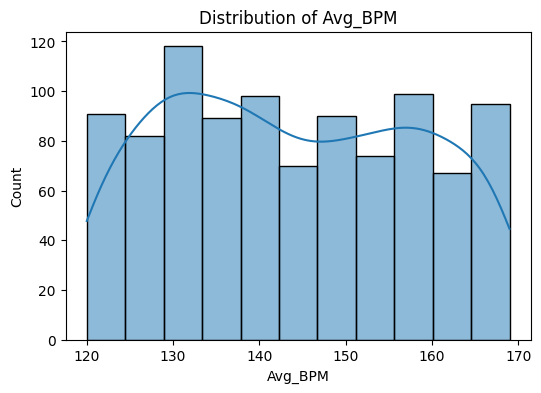

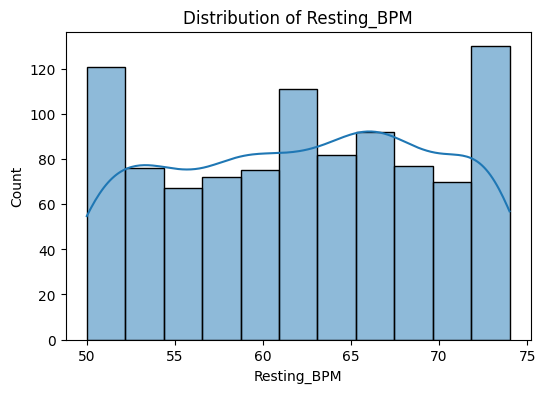

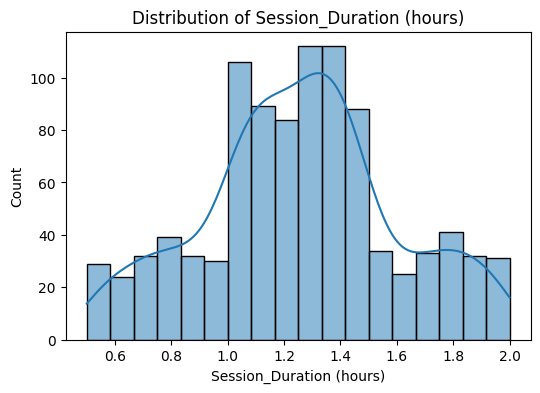

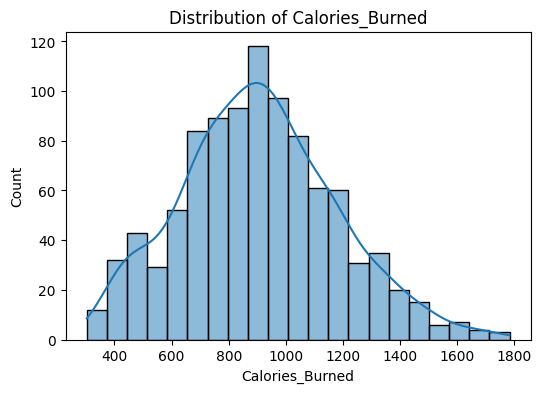

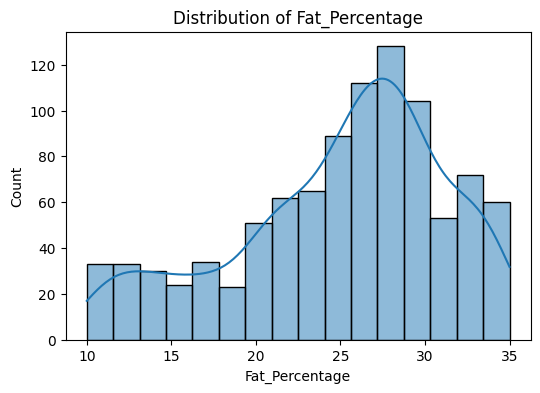

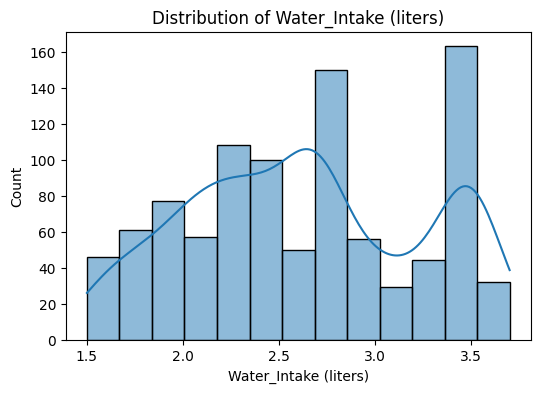

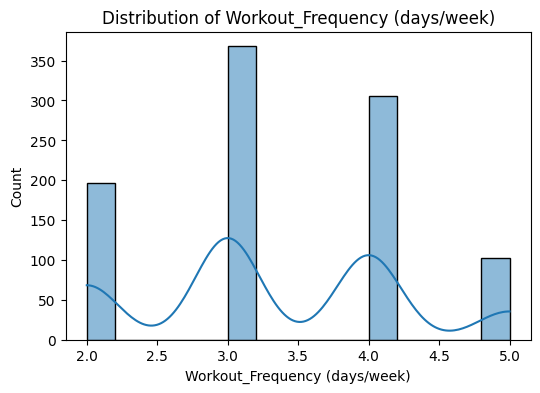

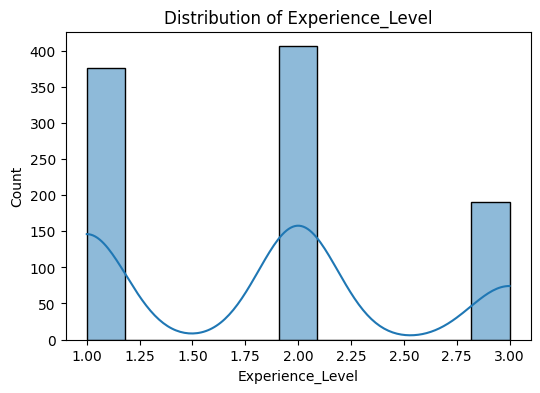

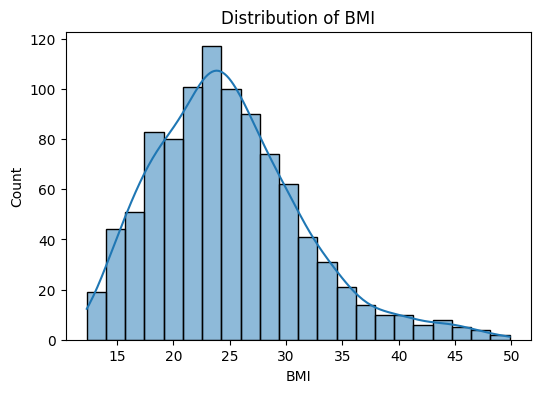

In [14]:

# 5. Visualize the distribution of numerical columns
numeric_columns = gym_members.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(gym_members[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [15]:
gym_members.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'BMI_Category'],
      dtype='object')

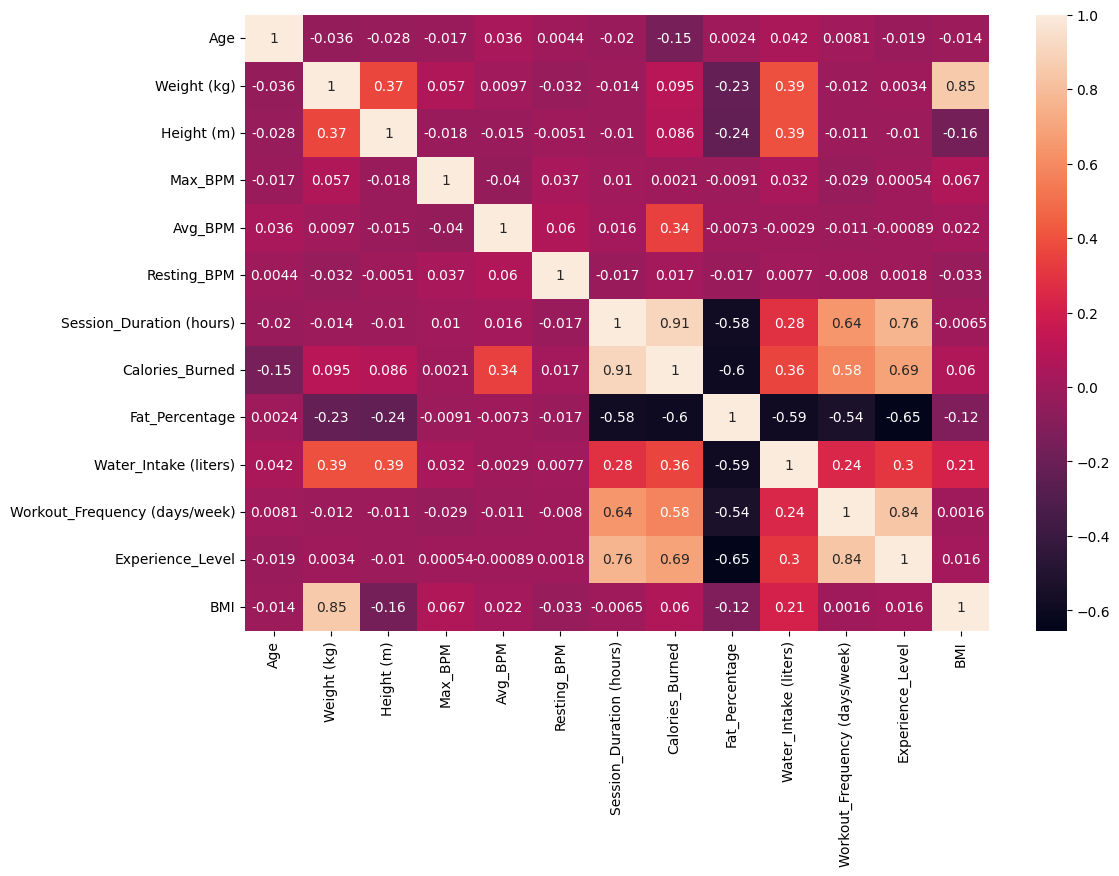

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(gym_members[numerical_features].corr(), annot=True)
plt.show()

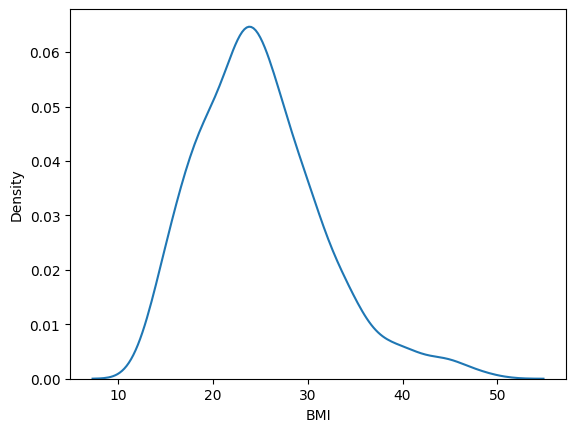

In [17]:
## kde plot of MBI and calori burn featurees
sns.kdeplot(gym_members['BMI'])
plt.show()

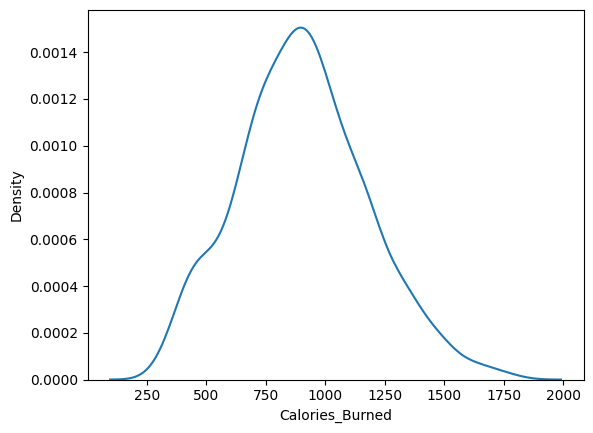

In [18]:
sns.kdeplot(gym_members['Calories_Burned'])
plt.show()

<Axes: >

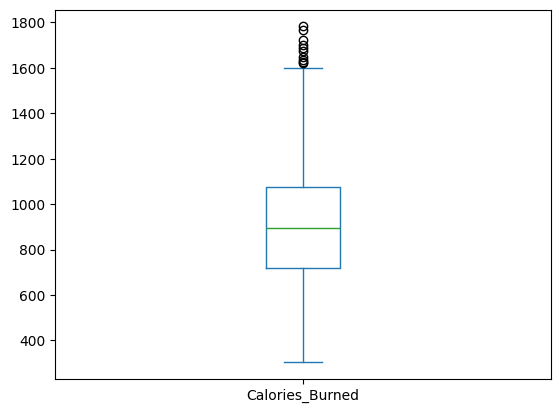

In [19]:
gym_members['Calories_Burned'].plot(kind='box')

<Axes: >

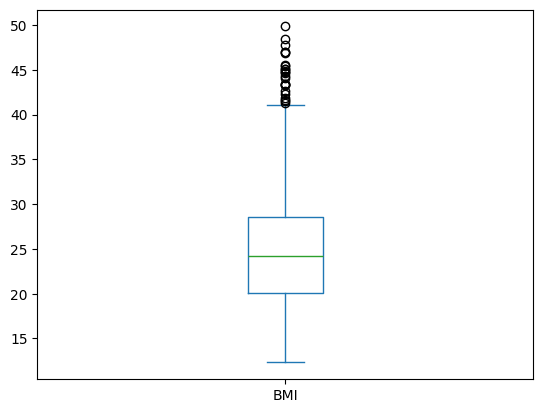

In [20]:
gym_members['BMI'].plot(kind='box')

## Remove outliers

In [21]:
np.array

<function numpy.array>

In [22]:
## outlier detector function
def outlier_detector(arr):
    ## arr is a array
    q1 = arr.quantile(0.25)
    q3 = arr.quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    return upper, lower

In [23]:
outlier_summary = {}

for col in numerical_features:
    upper, lower = outlier_detector(gym_members[col])
    outliers = gym_members[(gym_members[col] > upper) | (gym_members[col] < lower)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'Age': 0,
 'Weight (kg)': 9,
 'Height (m)': 0,
 'Max_BPM': 0,
 'Avg_BPM': 0,
 'Resting_BPM': 0,
 'Session_Duration (hours)': 0,
 'Calories_Burned': 10,
 'Fat_Percentage': 0,
 'Water_Intake (liters)': 0,
 'Workout_Frequency (days/week)': 0,
 'Experience_Level': 0,
 'BMI': 25}

In [24]:
# Function to remove outliers
def remove_outliers(df, numerical_features):
    for col in numerical_features:
        upper, lower = outlier_detector(df[col])
        df = df[(df[col] <= upper) & (df[col] >= lower)]
    return df

# Remove outliers from the gym_members dataset
gym_members_cleaned = remove_outliers(gym_members, numerical_features)
gym_members_cleaned.shape

(931, 16)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(gym_members_cleaned[numerical_features])

numerical_df = pd.DataFrame(scaled_numerical_features, columns=gym_members[numerical_features].columns)
numerical_df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.419723,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724
1,0.594447,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428
2,-0.560939,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125
3,-1.138632,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841
4,-0.065774,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,-1.221160,0.771377,0.129998,0.617585,1.018682,0.656782,0.929402,1.771888,-2.431205,1.479839,0.749842,1.617739,0.776680
927,-1.138632,-0.279977,-0.881811,0.356630,1.578330,-0.839238,0.369907,1.376065,-0.021945,0.646971,-1.442003,-1.088667,0.246742
928,1.667305,-0.597948,0.285661,1.226481,-1.639645,-1.247244,1.371109,0.116281,-1.017772,0.147250,1.845764,1.617739,-0.818298
929,-0.560939,2.786900,0.830481,1.574422,0.179211,-0.023227,-0.454611,-0.058795,0.492031,-0.852191,-0.346081,0.264536,2.320041


In [26]:
# One-hot encode the categorical columns
gym_members_cleaned_encoded = pd.get_dummies(gym_members_cleaned, columns=categorical_features, drop_first=True, dtype='int64')

# Display the cleaned dataset with all columns
gym_members_cleaned_encoded.head()

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(gym_members_cleaned_encoded[numerical_features])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Concatenate the scaled numerical features with the encoded categorical features
gym_members_cleaned_encoded_scaled = pd.concat([scaled_df, gym_members_cleaned_encoded.drop(columns=numerical_features).reset_index(drop=True)], axis=1)

# Display the cleaned and scaled dataset
gym_members_cleaned_encoded_scaled.head()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.419723,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,Obese,1,0,0,1
1,0.594447,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,Obese,0,1,0,0
2,-0.560939,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,Normal weight,0,0,0,0
3,-1.138632,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,Underweight,1,0,1,0
4,-0.065774,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,Underweight,1,0,1,0


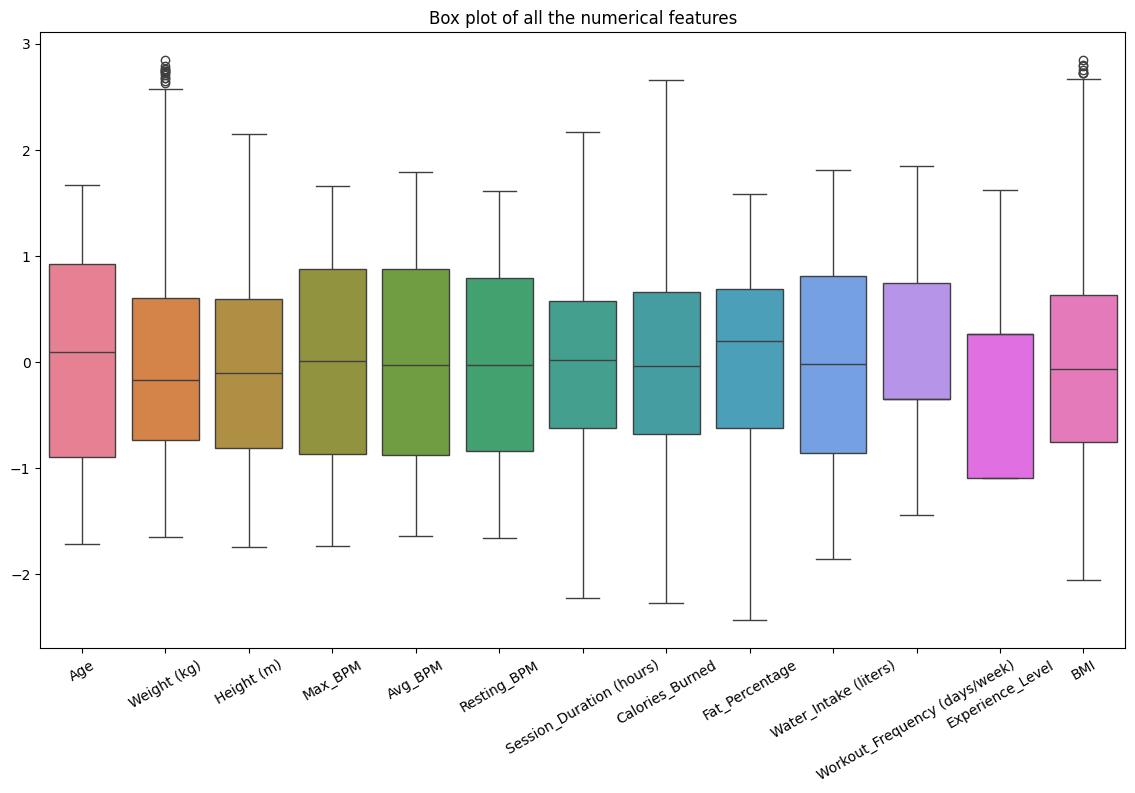

In [27]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(numerical_df)
plt.title("Box plot of all the numerical features")
plt.show()

In [28]:
weight_upper, weight_lower = outlier_detector(gym_members['Weight (kg)'])
cb_upper, cb_lower = outlier_detector(gym_members['Calories_Burned'])
bmi_upper, bmi_lower = outlier_detector(gym_members['BMI'])

In [29]:
df1 = gym_members[(gym_members['Weight (kg)'] > weight_lower) & (gym_members['Weight (kg)'] < weight_upper)]
df2 = df1[(df1['Calories_Burned'] > cb_lower) & (df1['Calories_Burned'] < cb_upper)]
df3 = df2[(df2['BMI'] > bmi_lower) & (df2['BMI'] < bmi_upper)]

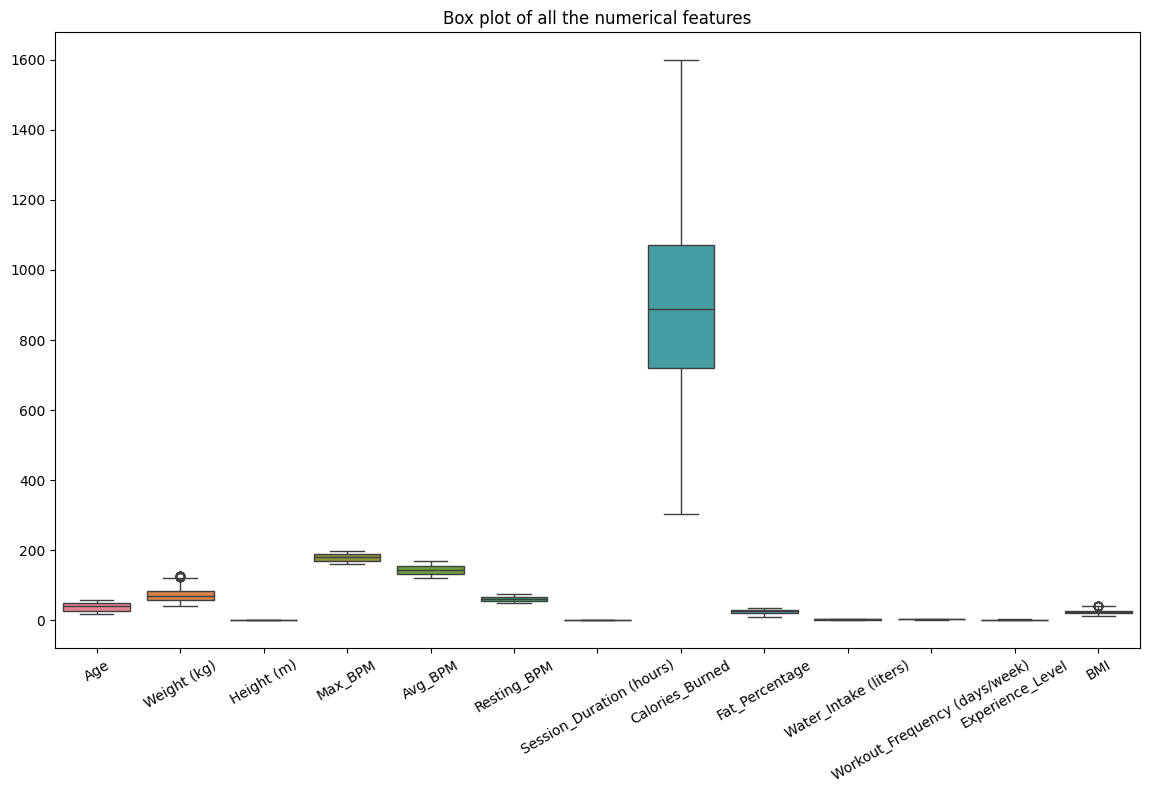

In [30]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(df3[numerical_features])
plt.title("Box plot of all the numerical features")
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df3[numerical_features])

numerical_df = pd.DataFrame(scaled_numerical_features, columns=df3[numerical_features].columns)

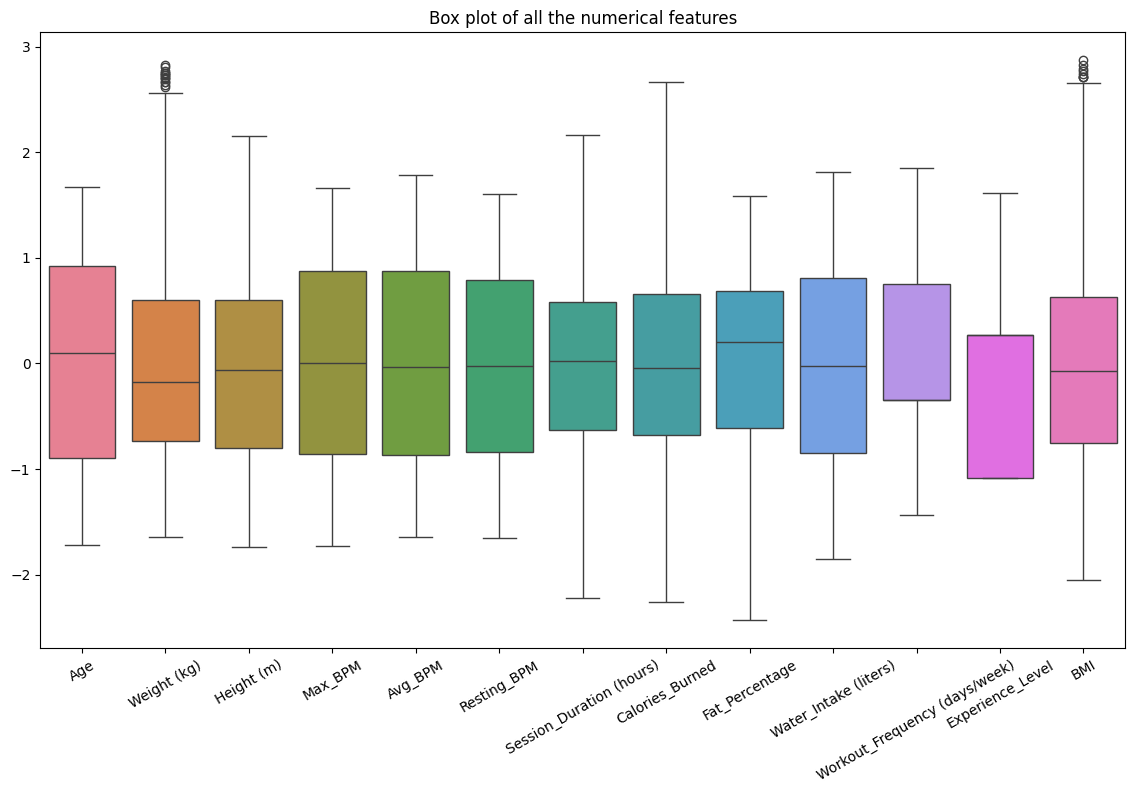

In [32]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(numerical_df)
plt.title("Box plot of all the numerical features")
plt.show()

<Axes: >

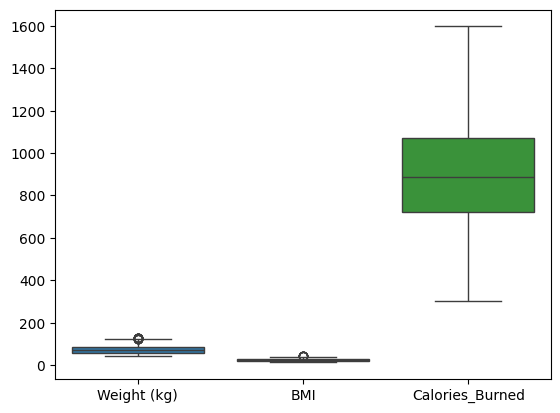

In [33]:
sns.boxplot(df3[['Weight (kg)', 'BMI', 'Calories_Burned']])

In [34]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].std()

,0
Weight (kg),19.581836
BMI,5.837905
Calories_Burned,262.988423


In [35]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].var()

,0
Weight (kg),383.448303
BMI,34.081139
Calories_Burned,69162.910409


In [36]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].min()

,0
Weight (kg),40.00
BMI,12.32
Calories_Burned,303.00


In [37]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].max()

,0
Weight (kg),127.50
BMI,41.03
Calories_Burned,1598.00


In [38]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].corr()

,Weight (kg),BMI,Calories_Burned
Weight (kg),1.000000,0.827216,0.104360
BMI,0.827216,1.000000,0.062816
Calories_Burned,0.104360,0.062816,1.000000


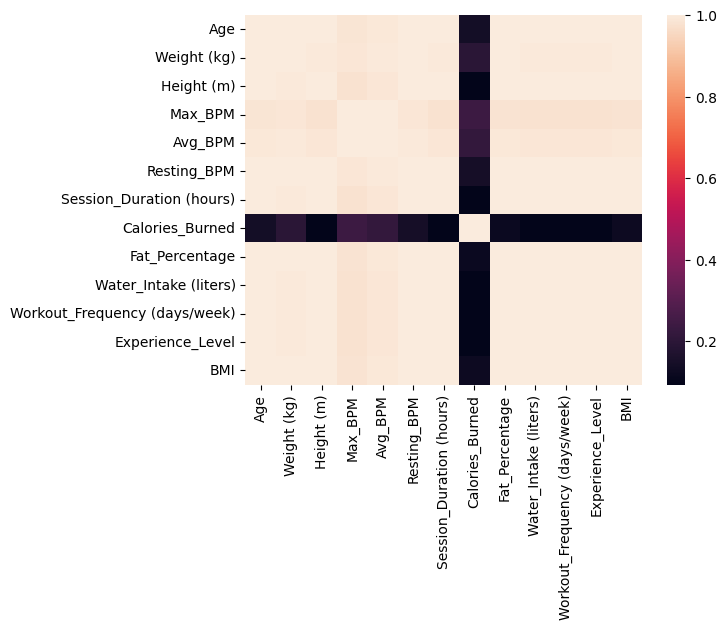

In [39]:
sns.heatmap(df3.describe().corr())
plt.show()

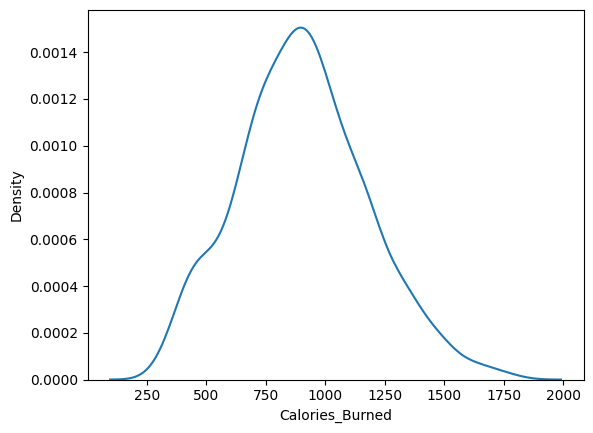

In [40]:
sns.kdeplot(gym_members['Calories_Burned'])
plt.show()

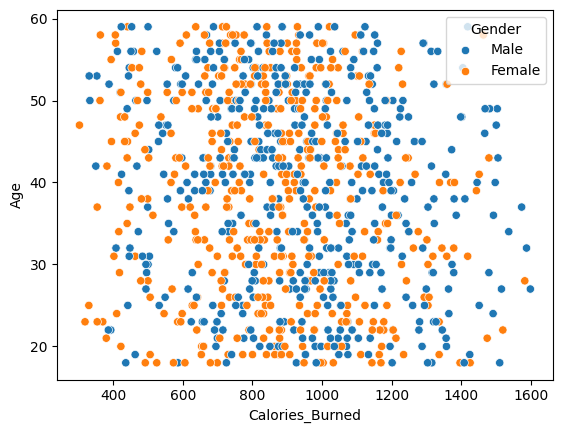

In [41]:
sns.scatterplot(data=df3, x='Calories_Burned', y='Age', hue='Gender')
plt.show()

## Building Machine Learning Model to detect BMI

In [42]:
gym_members_cleaned_encoded_scaled.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.419723,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,Obese,1,0,0,1
1,0.594447,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,Obese,0,1,0,0
2,-0.560939,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,Normal weight,0,0,0,0
3,-1.138632,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,Underweight,1,0,1,0
4,-0.065774,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,Underweight,1,0,1,0


In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the BMI_Category column
gym_members_cleaned_encoded_scaled['BMI_Category_Encoded'] = label_encoder.fit_transform(gym_members_cleaned_encoded_scaled['BMI_Category'])

# Display the first few rows to verify
gym_members_cleaned_encoded_scaled= gym_members_cleaned_encoded_scaled.drop(columns=['BMI_Category'])
gym_members_cleaned_encoded_scaled.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,BMI_Category_Encoded
0,1.419723,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,1,0,0,1,1
1,0.594447,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,0,1,0,0,1
2,-0.560939,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,0,0,0,0,0
3,-1.138632,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,1,0,1,0,3
4,-0.065774,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,1,0,1,0,3


## Numerical and Categorical features

In [44]:
## splot the data for traingin and for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gym_members_cleaned_encoded_scaled.drop(columns='Calories_Burned'),
                                                   gym_members_cleaned_encoded_scaled['Calories_Burned'],
                                                   test_size=0.25,
                                                   random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698, 17), (233, 17), (698,), (233,))

In [45]:
## regression algoriths
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [47]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mae, rmse, r2_square = evaluate_model(y_test, y_pred)
# Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
train_mae, train_rmse, train_r2_square = evaluate_model(y_train, y_train_pred)

print("Training set evaluation:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R2 Score:", train_r2_square)
print("=================================")
# Evaluate the model on the test set
test_mae, test_rmse, test_r2_square = evaluate_model(y_test, y_pred)

print("Test set evaluation:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R2 Score:", test_r2_square)

Training set evaluation:
MAE: 0.10983629067449908
RMSE: 0.14272800854411313
R2 Score: 0.97951368172862
Test set evaluation:
MAE: 0.10809036304023222
RMSE: 0.14073971193239987
R2 Score: 0.9804776022324463


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the train set
train_mae, train_rmse, train_r2_square = evaluate_model(y_train, y_train_pred)

print("Training set evaluation:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R2 Score:", train_r2_square)
print("=================================")

# Evaluate the model on the test set
test_mae, test_rmse, test_r2_square = evaluate_model(y_test, y_test_pred)

print("Test set evaluation:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R2 Score:", test_r2_square)

Training set evaluation:
MAE: 0.050144841324098174
RMSE: 0.06499105639538588
R2 Score: 0.9957523111582155
Test set evaluation:
MAE: 0.11977103261714828
RMSE: 0.15672811994093425
R2 Score: 0.9757900613089044


### Hyperparameter tunning for RandomForrestClassifier

In [49]:
from sklearn.model_selection import RandomizedSearchCV
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params)]

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

print(model_param['RF'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
84 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [50]:
model_param['RF']

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 8,
 'max_depth': None}

### Classificatoin


In [51]:
gym_members_cleaned_encoded_scaled.sample(10)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,BMI_Category_Encoded
723,-1.551270,-1.310817,-0.336991,0.617585,0.109255,1.336791,-1.014106,-0.907531,0.443846,-0.352470,-1.442003,-1.088667,-1.337913,0,1,0,0,3
895,-0.065774,-1.377489,-0.336991,1.139496,0.039299,-0.567234,-0.719635,-0.652530,0.765080,-0.352470,-0.346081,0.264536,-1.418781,0,1,0,0,3
234,1.254667,-0.864633,-0.103497,-1.383073,0.598946,0.656782,-1.426365,-1.215817,-0.118315,0.313824,-1.442003,-1.088667,-0.924974,1,0,0,0,0
492,-0.230829,0.684191,1.219638,1.313466,-0.450393,-0.295231,2.136733,2.259056,-1.869044,1.479839,1.845764,1.617739,-0.016507,1,0,0,1,0
554,-0.230829,-1.197989,-0.336991,1.226481,0.039299,-0.839238,-0.071799,-0.047377,1.375426,-1.685059,-0.346081,-1.088667,-1.205429,0,0,0,1,3
546,-1.468743,0.217493,-0.570485,0.008689,0.738858,-0.023227,-0.336823,-0.077825,1.070253,-1.518485,-0.346081,0.264536,0.649358,0,0,1,0,2
539,-0.230829,1.217561,1.063975,1.139496,-1.010041,0.384779,0.340460,0.279939,-0.632291,0.980118,-0.346081,-1.088667,0.590858,1,1,0,0,2
671,-1.551270,1.038062,1.686627,-0.339251,-0.870129,1.200790,-0.336823,-0.294766,-0.134377,-0.852191,-0.346081,0.264536,0.045434,1,1,0,0,0
118,0.346864,-0.756933,0.519155,-0.426237,1.578330,-0.023227,2.136733,2.209578,-1.178390,0.147250,0.749842,1.617739,-1.097032,0,0,0,1,3
364,1.089612,1.679132,2.075784,0.617585,-0.940085,0.656782,-0.955212,-1.143503,-0.182562,-1.018765,-1.442003,-1.088667,0.379226,1,0,0,0,2


In [52]:

X =gym_members_cleaned_encoded_scaled.drop('BMI_Category_Encoded', axis=1)
y = gym_members_cleaned_encoded_scaled['BMI_Category_Encoded']


In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Initialize weights and biases
def initialize_parameters(dim, num_classes):
    W = np.zeros((dim, num_classes))  # Weight matrix of shape (features, classes)
    b = np.zeros((1, num_classes))    # Bias of shape (1, classes)
    return W, b

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_hat + 1e-8)) / m  # Adding small value for numerical stability
    return loss

# Convert labels to one-hot encoding
def convert_to_one_hot(Y, num_classes):
    return np.eye(num_classes)[Y.reshape(-1)]

# Gradient descent for weight updates
def gradient_descent(X, Y, W, b, learning_rate, num_iterations):
    m = X.shape[0]

    for i in range(num_iterations):
        Z = np.dot(X, W) + b
        Y_hat = softmax(Z)
        loss = compute_loss(Y, Y_hat)

        dW = np.dot(X.T, (Y_hat - Y)) / m
        db = np.sum(Y_hat - Y, axis=0, keepdims=True) / m

        W -= learning_rate * dW
        b -= learning_rate * db

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return W, b

# Training function
def train_model(X_train, y_train, learning_rate=0.01, num_iterations=1000, num_classes=4):
    W, b = initialize_parameters(X_train.shape[1], num_classes)
    Y_train_one_hot = convert_to_one_hot(y_train, num_classes)
    W, b = gradient_descent(X_train, Y_train_one_hot, W, b, learning_rate, num_iterations)
    return W, b

# Predict function
def predict(X, W, b):
    Z = np.dot(X, W) + b
    Y_hat = softmax(Z)
    return np.argmax(Y_hat, axis=1)  # Return class labels

# Compute classification metrics
def compute_classification_metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred, digits=4))

# Prepare dataset
X = gym_members_cleaned_encoded_scaled.drop(columns='BMI_Category_Encoded').values
y = gym_members_cleaned_encoded_scaled['BMI_Category_Encoded'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
W, b = train_model(X_train, y_train, learning_rate=0.01, num_iterations=1000, num_classes=4)

# Evaluate on training data
train_predictions = predict(X_train, W, b)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
test_predictions = predict(X_test, W, b)
test_accuracy = np.mean(test_predictions == y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print classification metrics
print("\nTrain Classification Report:")
compute_classification_metrics(y_train, train_predictions)

print("\nTest Classification Report:")
compute_classification_metrics(y_test, test_predictions)


Iteration 0, Loss: 1.3863
Iteration 100, Loss: 1.1423
Iteration 200, Loss: 1.0211
Iteration 300, Loss: 0.9451
Iteration 400, Loss: 0.8906
Iteration 500, Loss: 0.8483
Iteration 600, Loss: 0.8138
Iteration 700, Loss: 0.7847
Iteration 800, Loss: 0.7596
Iteration 900, Loss: 0.7376
Train Accuracy: 0.8266
Test Accuracy: 0.7897

Train Classification Report:
              precision    recall  f1-score   support

           0     0.8088    0.9451    0.8716       273
           1     0.7760    0.8291    0.8017       117
           2     0.8777    0.6703    0.7601       182
           3     0.8696    0.7937    0.8299       126

    accuracy                         0.8266       698
   macro avg     0.8330    0.8095    0.8158       698
weighted avg     0.8322    0.8266    0.8233       698


Test Classification Report:
              precision    recall  f1-score   support

           0     0.7925    0.9333    0.8571        90
           1     0.7400    0.8043    0.7708        46
           2     0.7

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
precision_log_reg = precision_score(y_test, y_test_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_test_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_test_pred_log_reg, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1 Score: {f1_log_reg:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_log_reg))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_log_reg))

Logistic Regression Accuracy: 0.9399
Logistic Regression Precision: 0.9410
Logistic Regression Recall: 0.9399
Logistic Regression F1 Score: 0.9396
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        90
           1       0.95      0.91      0.93        46
           2       0.94      0.89      0.92        55
           3       0.97      0.93      0.95        42

    accuracy                           0.94       233
   macro avg       0.95      0.93      0.94       233
weighted avg       0.94      0.94      0.94       233

Confusion Matrix:
[[89  0  0  1]
 [ 1 42  3  0]
 [ 4  2 49  0]
 [ 3  0  0 39]]


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Set max depth to 3
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

Decision Tree Classifier Accuracy: 0.9957
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.98      0.99        46
           2       0.98      1.00      0.99        55
           3       1.00      1.00      1.00        42

    accuracy                           1.00       233
   macro avg       1.00      0.99      1.00       233
weighted avg       1.00      1.00      1.00       233

Confusion Matrix:
[[90  0  0  0]
 [ 0 45  1  0]
 [ 0  0 55  0]
 [ 0  0  0 42]]


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Define the parameter grid for Decision Tree Classifier
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, n_jobs=-1, verbose=2)
# Initialize GridSearchCV for Decision Tree Classifier
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the models
log_reg_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Logistic Regression
best_log_reg_params = log_reg_grid_search.best_params_
best_log_reg_score = log_reg_grid_search.best_score_

# Get the best parameters and best score for Decision Tree Classifier
best_dt_params = dt_grid_search.best_params_
best_dt_score = dt_grid_search.best_score_

print("Best Logistic Regression Parameters:", best_log_reg_params)
print("Best Logistic Regression Score:", best_log_reg_score)
print("Best Decision Tree Parameters:", best_dt_params)
print("Best Decision Tree Score:", best_dt_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Logistic Regression Parameters: {'C': 100, 'max_iter': 200, 'solver': 'saga'}
Best Logistic Regression Score: 0.9641829393627954
Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Score: 0.9985611510791367


In [57]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=gym_members_cleaned_encoded_scaled.drop(columns='BMI_Category_Encoded').columns)

# Feature selection using RFE for Linear Regression
lin_reg = LinearRegression()
rfe_lin_reg = RFE(estimator=lin_reg, n_features_to_select=10)
rfe_lin_reg.fit(X_train_df, y_train)

# Get the selected features for Linear Regression
selected_features_lin_reg = X_train_df.columns[rfe_lin_reg.support_]
print("Selected features for Linear Regression:", selected_features_lin_reg)

# Feature selection using feature importance for Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_df, y_train)

# Get feature importances and select top features
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_dt = X_train_df.columns[indices[:10]]
# Select top 3 features for Decision Tree Classifier
selected_top3_features_dt = X_train_df.columns[indices[:3]]
print("Selected top 3 features for Decision Tree Classifier:", selected_top3_features_dt)

print("Selected features for Decision Tree Classifier:", selected_features_dt)

Selected features for Linear Regression: Index(['Weight (kg)', 'Height (m)', 'Avg_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Fat_Percentage', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_Strength'],
      dtype='object')
Selected top 3 features for Decision Tree Classifier: Index(['BMI', 'Workout_Type_Yoga', 'Calories_Burned'], dtype='object')
Selected features for Decision Tree Classifier: Index(['BMI', 'Workout_Type_Yoga', 'Calories_Burned', 'Weight (kg)',
       'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage'],
      dtype='object')


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

Decision Tree Classifier Accuracy: 0.9957
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.98      0.99        46
           2       0.98      1.00      0.99        55
           3       1.00      1.00      1.00        42

    accuracy                           1.00       233
   macro avg       1.00      0.99      1.00       233
weighted avg       1.00      1.00      1.00       233

Confusion Matrix:
[[90  0  0  0]
 [ 0 45  1  0]
 [ 0  0 55  0]
 [ 0  0  0 42]]
